In [14]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [16]:
# S9R = pd.read_csv('./magazine/final/S9R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [17]:
# S9R['ADFN_2'] = S9R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [18]:
# S9R['ADFN_2']

0      [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1      [분석가, 적인, 성격, INTJ, 호기심, 책, 좋아하, 성향, 가지, 사이즈, ...
2      [쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,...
3      [베이지색, 재킷, 에러, ADERERROR, 니트, 베스트, 준지, 와이드, 팬츠...
4      [로이, 장식, 퍼프, 소매, 드레스, 플랫폼, 샌들, 미우, 미우, MIU, MI...
                             ...                        
277    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
278    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
279    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
280    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
281    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 282, dtype: object

In [92]:
# S8R = pd.read_csv('./magazine/final/S8R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [93]:
# S8R['ADFN_2'] = S8R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [94]:
# S8R['ADFN_2']

0      [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1      [패턴, 토, TOD, 클래식, 디자인, 검은색, 페니, LAURENT, ANTHO...
2      [셔츠, 재킷, 팬츠, LAURENT, ANTHONY, LAURENT, ANTHON...
3      [마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,...
4      [웨스턴, 무드, 벨트, LAURENT, ANTHONY, LAURENT, ANTHONY]
                             ...                        
295    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
296    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
297    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
298    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
299    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 300, dtype: object

In [184]:
S6R = pd.read_csv('./magazine/final/S6R_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [185]:
S6R['ADFN_2'] = S6R['ADFN_2'].str.replace('[', '').str.replace(']', '').str.replace("'", "").str.split(', ')

In [186]:
S6R['ADFN_2']

0      [빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU...
1      [블랙, 보디, LAURENT, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LA...
2      [셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업...
3      [쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,...
4      [마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,...
                             ...                        
348    [말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,...
349    [로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱...
350    [로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,...
351    [영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s...
352    [영문, 스크립트, 한국, 걸그룹, 최초, 한국, 최초, 에픽하이, 영상, 나온, ...
Name: ADFN_2, Length: 353, dtype: object

### top50 리스트 생성

In [187]:
top500 = pd.read_csv('./S6R_top500.csv', sep='|', encoding = 'utf-8')

In [188]:
top500

,word,count
0,로제,9279
1,예쁘다,1383
2,귀엽다,1064
3,사랑,798
4,노래,697
...,...,...
495,댄서,21
496,re,21
497,And,21
498,can,21


In [189]:
top30 = []
for i in range(30):
    top30.append(top500.loc[i, 'word'])
    
print(len(top30))
print(top30)

30
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'LAURENT', '음색', '솔로', '음악', '챙', '무대', 'BEST', '머리', '춤', '매력', '느낌', '레전드', '아이돌', '패션', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '스타일', '최고']


In [190]:
top50 = []
for i in range(50):
    top50.append(top500.loc[i, 'word'])
    
print(len(top50))
print(top50)

50
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'LAURENT', '음색', '솔로', '음악', '챙', '무대', 'BEST', '머리', '춤', '매력', '느낌', '레전드', '아이돌', '패션', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '스타일', '최고', '브랜드', '영어', '여신', '공주', '창법', '입덕', '몸매', '춤선', '가수', '분위기', '컬렉션', '모델', '한국', '쇼', '드레스', nan, '찰떡', '스타', '퀸', '디자이너']


### top100

In [191]:
top100 = []
for i in range(100):
    top100.append(top500.loc[i, 'word'])
    
print(len(top100))
print(top100)

100
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'LAURENT', '음색', '솔로', '음악', '챙', '무대', 'BEST', '머리', '춤', '매력', '느낌', '레전드', '아이돌', '패션', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '스타일', '최고', '브랜드', '영어', '여신', '공주', '창법', '입덕', '몸매', '춤선', '가수', '분위기', '컬렉션', '모델', '한국', '쇼', '드레스', nan, '찰떡', '스타', '퀸', '디자이너', '실력', '대박', 'ANTHONY', '발음', '여성', '짱', '컬러', '블랙', '라이브', '애교', '파리', '하우스', '봄', '보컬', '멋있다', 'BLINK', '왕', '미모', '소리', '천사', '신', '요정', '시작', '명품', '헤어', '핑크', '허리', '순간', '심장', '표정', '고급', '인기', '다리', '재킷', '사기', '소재', '원', '팬츠', '디자인', '사랑스럽다', 'HEDI', '세계', '시즌', '말투', '커버', '최애', '누나', '집', '제만', '걸그룹']


In [192]:
top200 = []
for i in range(200):
    top200.append(top500.loc[i, 'word'])
    
print(len(top200))
print(top200)

200
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'LAURENT', '음색', '솔로', '음악', '챙', '무대', 'BEST', '머리', '춤', '매력', '느낌', '레전드', '아이돌', '패션', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '스타일', '최고', '브랜드', '영어', '여신', '공주', '창법', '입덕', '몸매', '춤선', '가수', '분위기', '컬렉션', '모델', '한국', '쇼', '드레스', nan, '찰떡', '스타', '퀸', '디자이너', '실력', '대박', 'ANTHONY', '발음', '여성', '짱', '컬러', '블랙', '라이브', '애교', '파리', '하우스', '봄', '보컬', '멋있다', 'BLINK', '왕', '미모', '소리', '천사', '신', '요정', '시작', '명품', '헤어', '핑크', '허리', '순간', '심장', '표정', '고급', '인기', '다리', '재킷', '사기', '소재', '원', '팬츠', '디자인', '사랑스럽다', 'HEDI', '세계', '시즌', '말투', '커버', '최애', '누나', '집', '제만', '걸그룹', '애기', '가사', '소름', '셔츠', '힘', '버전', '화보', '노력', '한국인', '독보', '눈치', '좋', '톱', '시크', '남자', '완벽', '존재', '포인트', '활동', '한국어', '남', '친구', 'ANGEL', 'GLOBAL', '코디', '없음', '라인', '디렉터', '까', '꼭', '미쳤어', '아아', 'If', '탑', '관심', '로지', '이지', '물', '기분', '연예인', 'LOVE', '장식', '리본', '특유', '외모', '인스타', 'BODY', 'PERFECT', 'BEAUTIFUL', '웃기', 'first', '강냉이', '소화', '풀', '아티스트', '끝', '형',

In [193]:
top300 = []
for i in range(300):
    top300.append(top500.loc[i, 'word'])
    
print(len(top300))
print(top300)

300
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'LAURENT', '음색', '솔로', '음악', '챙', '무대', 'BEST', '머리', '춤', '매력', '느낌', '레전드', '아이돌', '패션', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '스타일', '최고', '브랜드', '영어', '여신', '공주', '창법', '입덕', '몸매', '춤선', '가수', '분위기', '컬렉션', '모델', '한국', '쇼', '드레스', nan, '찰떡', '스타', '퀸', '디자이너', '실력', '대박', 'ANTHONY', '발음', '여성', '짱', '컬러', '블랙', '라이브', '애교', '파리', '하우스', '봄', '보컬', '멋있다', 'BLINK', '왕', '미모', '소리', '천사', '신', '요정', '시작', '명품', '헤어', '핑크', '허리', '순간', '심장', '표정', '고급', '인기', '다리', '재킷', '사기', '소재', '원', '팬츠', '디자인', '사랑스럽다', 'HEDI', '세계', '시즌', '말투', '커버', '최애', '누나', '집', '제만', '걸그룹', '애기', '가사', '소름', '셔츠', '힘', '버전', '화보', '노력', '한국인', '독보', '눈치', '좋', '톱', '시크', '남자', '완벽', '존재', '포인트', '활동', '한국어', '남', '친구', 'ANGEL', 'GLOBAL', '코디', '없음', '라인', '디렉터', '까', '꼭', '미쳤어', '아아', 'If', '탑', '관심', '로지', '이지', '물', '기분', '연예인', 'LOVE', '장식', '리본', '특유', '외모', '인스타', 'BODY', 'PERFECT', 'BEAUTIFUL', '웃기', 'first', '강냉이', '소화', '풀', '아티스트', '끝', '형',

In [194]:
t500 = []
for i in range(500):
    t500.append(top500.loc[i, 'word'])
    
print(len(t500))
print(t500[:91])

500
['로제', '예쁘다', '귀엽다', '사랑', '노래', '목소리', 'LAURENT', '음색', '솔로', '음악', '챙', '무대', 'BEST', '머리', '춤', '매력', '느낌', '레전드', '아이돌', '패션', '처음', '금발', '직캠', '코첼라', '머리카락', '여자', '인간', '바람', '스타일', '최고', '브랜드', '영어', '여신', '공주', '창법', '입덕', '몸매', '춤선', '가수', '분위기', '컬렉션', '모델', '한국', '쇼', '드레스', nan, '찰떡', '스타', '퀸', '디자이너', '실력', '대박', 'ANTHONY', '발음', '여성', '짱', '컬러', '블랙', '라이브', '애교', '파리', '하우스', '봄', '보컬', '멋있다', 'BLINK', '왕', '미모', '소리', '천사', '신', '요정', '시작', '명품', '헤어', '핑크', '허리', '순간', '심장', '표정', '고급', '인기', '다리', '재킷', '사기', '소재', '원', '팬츠', '디자인', '사랑스럽다', 'HEDI']


### top50만 남기기

In [195]:
len(S6R)

353

In [196]:
top30_word = []
for i in range(len(S6R)):
    w=[]
    for word in S6R.loc[i, 'ADFN_2']:
        if word in top30:
            w.append(word)
    top30_word.append(w)

In [197]:
top50_word = []
for i in range(len(S6R)):
    w=[]
    for word in S6R.loc[i, 'ADFN_2']:
        if word in top50:
            w.append(word)
    top50_word.append(w)

In [198]:
top100_word = []
for i in range(len(S6R)):
    w=[]
    for word in S6R.loc[i, 'ADFN_2']:
        if word in top100:
            w.append(word)
    top100_word.append(w)

In [199]:
top200_word = []
for i in range(len(S6R)):
    w=[]
    for word in S6R.loc[i, 'ADFN_2']:
        if word in top200:
            w.append(word)
    top200_word.append(w)

In [200]:
top300_word = []
for i in range(len(S6R)):
    w=[]
    for word in S6R.loc[i, 'ADFN_2']:
        if word in top300:
            w.append(word)
    top300_word.append(w)

In [201]:
top500_word = []
for i in range(len(S6R)):
    w=[]
    for word in S6R.loc[i, 'ADFN_2']:
        if word in t500:
            w.append(word)
    top500_word.append(w)

### 전체

In [202]:
S6R

,magazine,brand,title,word,ADFN,ADFN_2
0,A,YSL,"깊게 뿌리내리기 위하여, 수영","['빨간 더블 브레스티드 코트, 타이츠, 라텍스 소재 보디슈트와 사이하이 부츠는 모...","['빨갛', '더블', '코트', '타이츠', '라텍스', '소재', '보디', '...","[빨갛, 더블, 코트, 타이츠, 라텍스, 소재, 보디, 슈트, 하이, 부츠, LAU..."
1,A,YSL,백 하나 살까 고민했다면? 영원한 아이코닉 백 6가지,[' 블랙 보디에 YSL 골드 잠금장치를 더한 스몰 사이즈 솔페리노 사첼백은 4백...,"['블랙', '보디', 'YSL', '골드', '잠금장치', '스몰', '사이즈',...","[블랙, 보디, LAURENT, 골드, 잠금장치, 스몰, 사이즈, 솔, 페리, LA..."
2,A,YSL,골든의 황금시간,[' 셔츠는 생로랑 바이 안토니 바카렐로(Saint Laurent by Antho...,"['셔츠', 'LAURENT', 'ANTHONY', 'LAURENT', 'ANTHO...","[셔츠, LAURENT, ANTHONY, LAURENT, ANTHONY, 슈트, 업..."
3,A,YSL,다이어트의 마음,['나는 쉬지 않고 다이어트를 한다. 평생을 장거리 수영선수 같은 몸을 가지고 싶었...,"['쉬', '다이어트', '평생', '장거리', '수영', '선수', '몸', '가...","[쉬, 다이어트, 평생, 장거리, 수영, 선수, 몸, 가지, 불어나, 몸, 오래전,..."
4,A,YSL,네? 명품 브랜드의 마스크라고요? 코로나19가 바꾼 전 세계 패션 신,"['마스크 품귀현상, 마스크 구입 5부제 등 우리나라를 떠들썩하게 만들었던 마스크 ...","['마스크', '품귀', '현상', '마스크', '구입', '우리나라', '마스크'...","[마스크, 품귀, 현상, 마스크, 구입, 우리나라, 마스크, 대란, 현재, 안정적,..."
...,...,...,...,...,...,...
348,YOUTUBE,R,세상 귀욤()열매 혼자 다 먹은듯한 블랙핑크 로제 인스타라이브 (feat_ 지수_ ...,['지수 말투 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 연예인이지만 전형적인 10...,"['지수', '말투', 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ', '연예인',...","[말투, 연예인, 전형, 대들이, 친구, 노, 말투, 귀엽다, 로제, 사랑, 받고,..."
349,YOUTUBE,R,세상에 로제도 데이터 걱정한다_인스타라이브 [블랙핑크로제]_korean_commen...,"['박로제 진짜 매력은 가창력, 춤, 몸매가 아닌 순박함과 멍챙함인 듯ㅋㅋㅋㅌㅌㅌ'...","['박로', '제', '진짜', '매력', '은', '가창력', ',', '춤', ...","[로제, 매력, 가창력, 춤, 몸매, 아닌, 순박함과, 멍챙함, 로제, 데이터, 걱..."
350,YOUTUBE,R,스타일리스트가 분석한 로제 패션이 진짜 넘사벽인 이유_korean_comment.csv,"['로제가 진짜 보석인듯', '솔직히 BLACKPINK는 맴버하나하나 다 패션분석쌉...","['로제', '가', '진짜', '보석', '인', '듯', ""',"", ""'"", '...","[로제, 보석, BLACKPINK, 맴버, 패션, 분석, 쌉, 가능, CHANEL,..."
351,YOUTUBE,R,아무데서나 볼 수 없을걸요 로제 커버 화보 촬영현장 비하인드 대방출! by W Ko...,['영어 자막이 추가되었습니다! 즐겁게 감상 부탁드려요 :)English subti...,"['영어', '자막', '이', '추가', '되었습니다', '!', '즐겁게', '...","[영어, 자막, 추가, 되었습니다, 즐겁게, 감상, 부탁드려요, English, s..."


### item 남기기

In [203]:
item = ['백', '드레스', '재킷', '주얼리', '옷', '슈즈', '스커트', '링', '팬츠', '가방', '슈트', '향수', '의상', '데님', '액세서리', '톱',
'셔츠', '모자', '수트', '스니커즈', '니트', '시계', '워치', '핸드백', '벨트', '선글라스', '목걸이', '티셔츠', '쇼츠', '샌들',
 '귀고리', '워치', '코트', '부츠', '케이프']

In [204]:
# item_word = []
# for i in range(len(mag_je)):
#     w=[]
#     for word in mag_je.loc[i, 'ADFN']:
#         if word in item:
#             w.append(word)
#     item_word.append(w)

### top100이면서 item이 아닌 것

In [205]:
# top100_not_item_word = []
# for i in range(len(tot_je)):
#     w=[]
#     for word in tot_je.loc[i, 'ADFN']:
#         if word in top100:
#             if word not in item:
#                 w.append(word)
#     top100_not_item_word.append(w)

In [206]:
# len(top100_not_item_word)

In [207]:
# top100_not_item_word[1]

In [208]:
top50_word

[['LAURENT', 'LAURENT'],
 ['LAURENT', 'LAURENT', 'LAURENT', 'LAURENT', 'LAURENT', '브랜드'],
 ['LAURENT', 'LAURENT', '스타일'],
 ['최고', '사랑', '스타일', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['브랜드', 'LAURENT'],
 ['쇼', 'LAURENT', 'LAURENT'],
 ['드레스', 'LAURENT', 'LAURENT', '드레스', 'LAURENT'],
 ['브랜드',
  '브랜드',
  '브랜드',
  '컬렉션',
  '드레스',
  '브랜드',
  'LAURENT',
  '브랜드',
  '디자이너',
  '디자이너',
  '브랜드',
  'LAURENT',
  '브랜드',
  '브랜드'],
 ['패션', 'LAURENT', '패션', '찰떡', '사랑'],
 ['브랜드', '컬렉션', 'LAURENT', '브랜드'],
 ['LAURENT', 'LAURENT'],
 ['드레스', 'LAURENT', 'LAURENT'],
 ['LAURENT', '사랑', 'LAURENT', '무대', '몸매'],
 ['LAURENT', '스타일', 'LAURENT', '패션'],
 ['LAURENT'],
 ['LAURENT', '스타일', '매력'],
 ['LAURENT', 'LAURENT', 'LAURENT', 'LAURENT'],
 ['LAURENT', 'LAURENT', 'LAURENT'],
 ['LAURENT', '분위기', '사랑', '컬렉션', 'LAURENT', '모델', 'LAURENT', '매력', '스타일'],
 ['매력', '디자이너', '드레스', '모델', '드레스', '드레스', 'LAURENT', '여자'],
 ['LAURENT'],
 ['LAURENT', '패션', '브랜드', '처음', '패션', '느낌'],
 [],
 ['LAURENT'],
 ['LAURENT', '패션'],
 ['LAURENT', 'LA

In [209]:
len(top50_word)

353

### 텍스트 한줄씩 읽어와 dataset에 기록

### 어프라이어리(Apriori) 알고리즘을 적용하여 연관규칙 분석 수행

In [210]:
# 어프라이어리(Apriori)
from apyori import apriori

In [211]:
top30_word[0]

['LAURENT', 'LAURENT']

In [220]:
# 지지도(support) : P(A∩B)
result = list(apriori(top500_word, min_support = 0.06))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x:len(x))
df = df[(df['length'] == 2) 
        & (df['support'] >= 0.01)].sort_values(by='support', ascending = False)
df.head(10)

,items,support,ordered_statistics,length
215,"(패션, LAURENT)",0.178470,"[((), (패션, LAURENT), 0.17847025495750707, 1.0)...",2
411,"(사랑, 로제)",0.167139,"[((), (사랑, 로제), 0.1671388101983003, 1.0), ((로제...",2
187,"(브랜드, LAURENT)",0.158640,"[((), (LAURENT, 브랜드), 0.15864022662889518, 1.0...",2
213,"(컬렉션, LAURENT)",0.158640,"[((), (컬렉션, LAURENT), 0.15864022662889518, 1.0...",2
399,"(매력, 로제)",0.155807,"[((), (매력, 로제), 0.1558073654390935, 1.0), ((로제...",2
195,"(스타일, LAURENT)",0.155807,"[((), (스타일, LAURENT), 0.1558073654390935, 1.0)...",2
428,"(음악, 로제)",0.155807,"[((), (음악, 로제), 0.1558073654390935, 1.0), ((로제...",2
298,"(로제, 노래)",0.152975,"[((), (로제, 노래), 0.1529745042492918, 1.0), ((노래...",2
189,"(사랑, LAURENT)",0.138810,"[((), (사랑, LAURENT), 0.1388101983002833, 1.0),...",2
426,"(로제, 예쁘다)",0.138810,"[((), (로제, 예쁘다), 0.1388101983002833, 1.0), ((로...",2


In [221]:
for item in df['items']:
    if '리사' in item:
        print(item)

In [222]:
df[df['items'] == {'리사'}]

,items,support,ordered_statistics,length


### networkx 그래프 정의

In [223]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [224]:
# 페이지 랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [225]:
pos = nx.spring_layout(G)

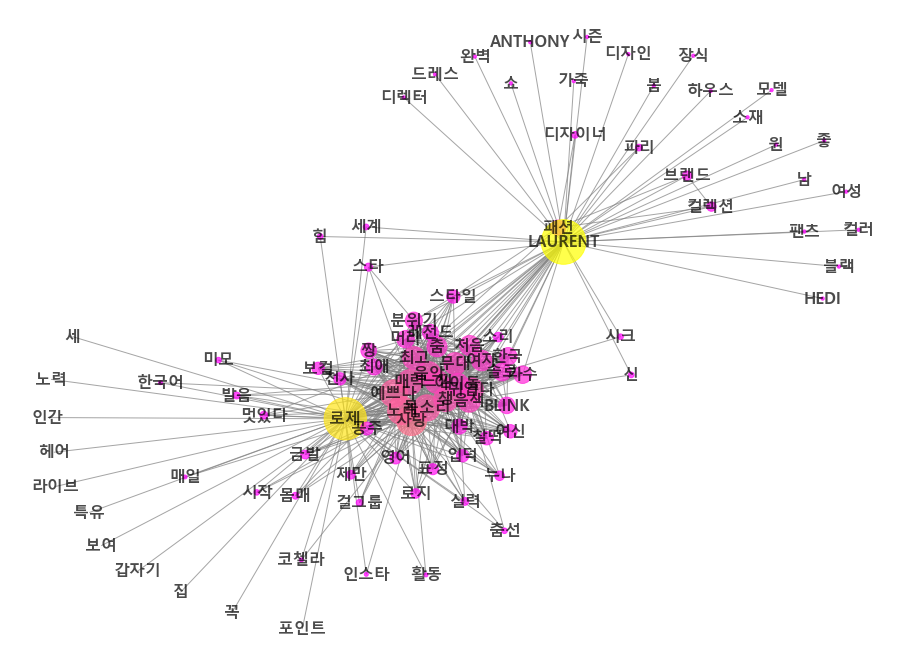

In [227]:
plt.figure(figsize = (16, 12)) ; plt.axis('off')
nx.draw_networkx(G, font_family = 'Malgun Gothic', font_size = 16,
                pos = pos, node_color = list(pr.values()), node_size = nsize,
                alpha=0.7, edge_color='.5', cmap = plt.cm.spring,
                font_color = 'black', font_weight = 'bold')

plt.savefig('./nt_S6R_top500_mis06-b.png', bbox_inches = 'tight')
plt.show()


In [31]:
# ['첫', '처음', '공개', '작업', '이후', '펜디', '판매', '작품', '드', '예정', '시대']